# Week 6: Colab Experiment

# I. Introduction
In this exercise, we apply dimension reduction methods and clustering algorithms to single-cell sequencing data.

# II. Methods
### Write Something

In [1]:

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Mounted at /content/drive


In [2]:
# Load the data and normalize the single-cell sequencing counts by total counts and log transform the counts
tasic2018 = np.load("/content/drive/MyDrive/Colab Notebooks/ML EE/Week6/cell_data.npz")

# data normalization
librarySizes = tasic2018['counts'].sum(axis=1)    # Compute library sizes
CPM = tasic2018['counts'] / librarySizes.reshape(-1,1) * 1e+6              # Library size normalisation
logCPM = np.log2(CPM + 1) # Log-transformation

In [3]:
# TODO:
# Implement PCA with 2 axis
pca= PCA(n_components = 2)
# store your result in X or change the plt.scatter
# X = PCA_RESULT

#fit and transform the data
X = pca.fit_transform(logCPM)

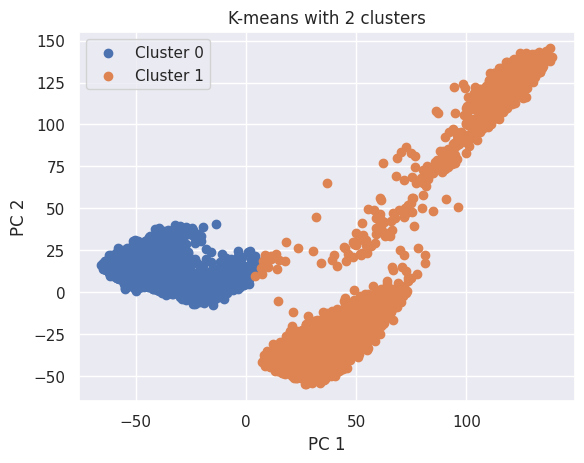

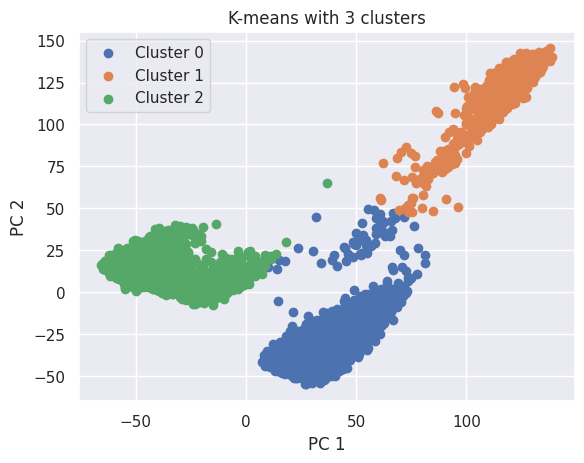

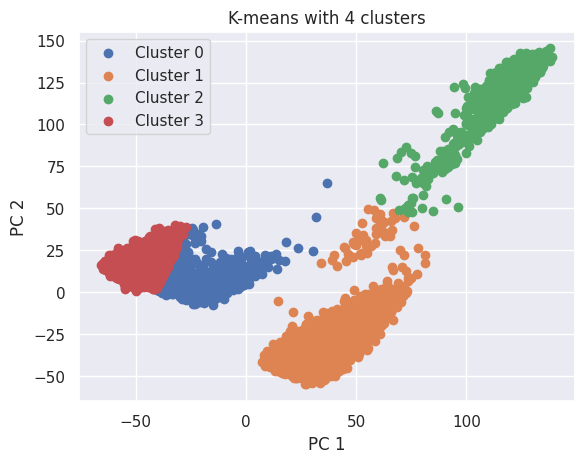

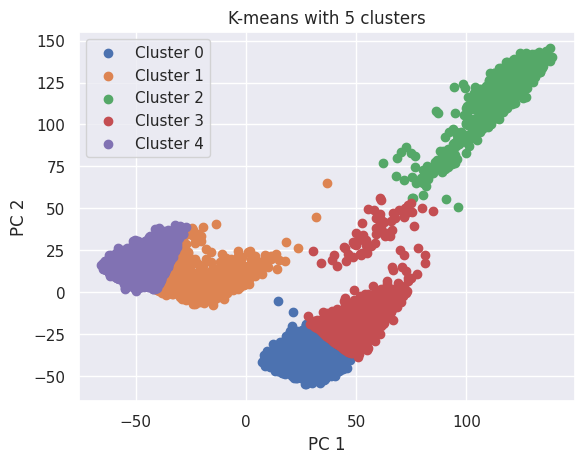

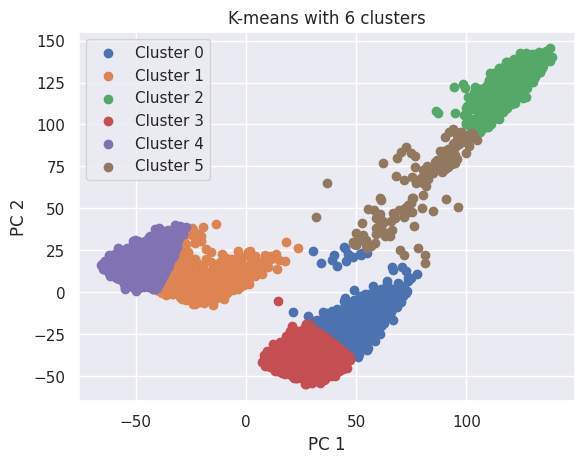

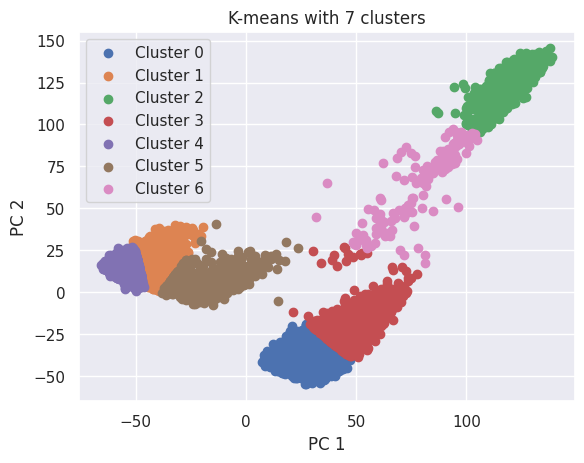

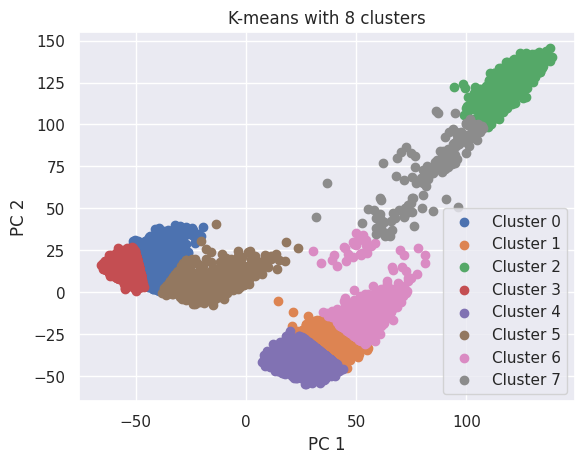

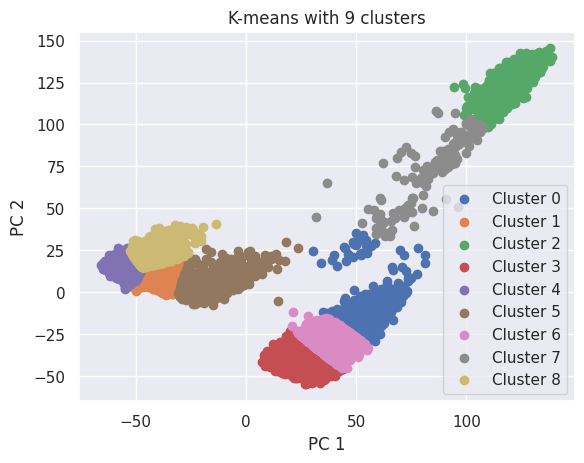

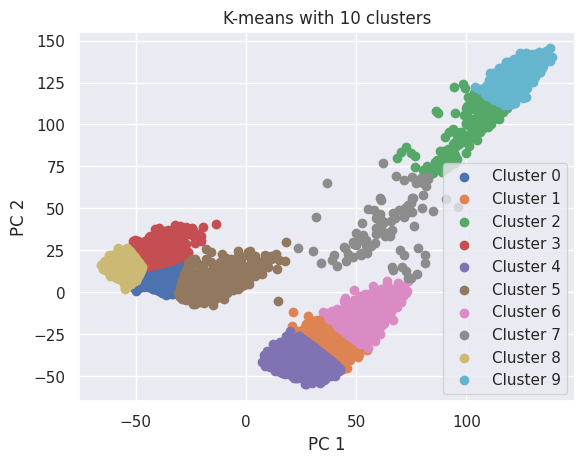

In [4]:
# TODO
# Implement K-Means

k_grid = range(2,11,1)
score = []

#iterate through the k_grid
for i in k_grid:
  #apply KMeans with 10 different initializations of centroid
  #KMeans will automatically select the best one
  k_means = KMeans(n_clusters= i, n_init = 10)
  #fit and predict
  X_clusters = k_means.fit_predict(X)

  #compute score using silhouette_score, value between -1 to 1
  #closer to 1 means a sign of good clustering, negative means the sample might be assigned to the wrong cluster
  cur_score = silhouette_score(X, X_clusters)
  score.append(cur_score)

  #create figure to see how KMeans cluster the data
  plt.figure()
  for j in range(i):
    plt.scatter(X[X_clusters == j, 0], X[X_clusters == j, 1], label=f'Cluster {j}')
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.title(f'K-means with {i} clusters')
  plt.legend()
  plt.show()


## III. Results

Here we show the scatter plot of the top 2 PCs. We also show the silhouette score with respect to the number of k-means clusters.

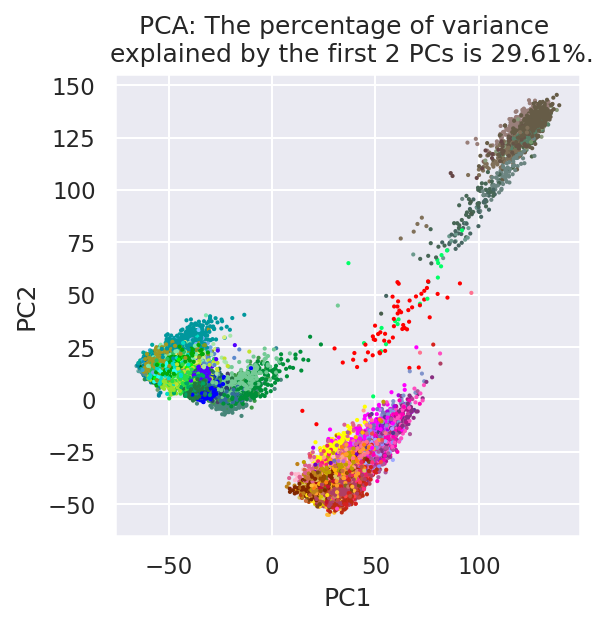

In [5]:
# Principal component analysis scatter plot

plt.figure(figsize=(4,4), dpi=150)
plt.scatter(X[:,0], X[:,1], s=1, color=tasic2018['clusterColors'][tasic2018['clusters']])
plt.title(f"PCA: The percentage of variance \n explained by the first 2 PCs is {round(sum(pca.explained_variance_ratio_) * 100 , 2)}%.")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

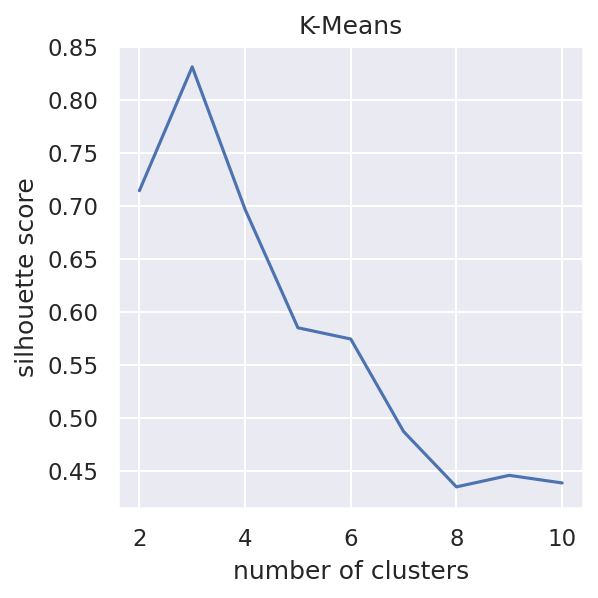

In [6]:
# k-means clustering performance
plt.figure(figsize=(4,4), dpi=150)
plt.plot(k_grid, score)
plt.title('K-Means')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

# IV. Conclusion and Discussion

### Please observe the plot image and write down your findings.

From the plot image above, we can see that K=3 is the optimal K for this dataset. </br></br>
Increasing the K further has a diminishing return instead. The silhouette score fall drastically as we try to increase the K more than 3. A possible reason behind this fall off is that large number of K can lead to K-means to make unnecessary divisions of data and as a result, cannot appropriately capture the structure of the data. It also gets harder to distinguish between clusters.</br></br>
This can be seen from the figure that we print out. It is much easier to understand why K means group certain data together when K = 3 when compared to K = 10. When K = 10, it feels like K means algorithm is just creating unnecessary segmentation.

